In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Install torch**

In [2]:
!pip3 install torch==1.8.2+cu111 torchvision==0.9.2+cu111 torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
     |█████████████▌                  | 834.1 MB 1.6 MB/s eta 0:12:02tcmalloc: large alloc 1147494400 bytes == 0x3b1c000 @  0x7fd2638c8615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████               | 1055.7 MB 1.5 MB/s eta 0:10:31tcmalloc: large alloc 1434370048 bytes == 0x48172000 @  0x7fd2638c8615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████████▋          | 1336.2 MB 1.5 MB/s eta 0:07:08tcmalloc: large alloc 1792966656 byt

# **2. Donwload YoLoV5**

In [ ]:
%cd /content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5
!git clone https://github.com/ultralytics/yolov5  # clone

/content/drive/.shortcut-targets-by-id/1sNb57uh5bK73mVEZMV7wv1YwhYllWF2t/PhatHienDuongLuoiBo/YoloV5
fatal: destination path 'yolov5' already exists and is not an empty directory.


# **3. Install library**

In [3]:
%cd /content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5

/content/drive/.shortcut-targets-by-id/1sNb57uh5bK73mVEZMV7wv1YwhYllWF2t/PhatHienDuongLuoiBo/YoloV5


In [4]:
%cd yolov5
!pip install -r requirements.txt  # install

/content/drive/.shortcut-targets-by-id/1sNb57uh5bK73mVEZMV7wv1YwhYllWF2t/PhatHienDuongLuoiBo/YoloV5/yolov5
     |████████████████████████████████| 596 kB 5.3 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import xml.etree.ElementTree as ET
import os

# processdata

In [ ]:
# !unrar x "/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/dataset.rar" "/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/data"

# 5. Data processing
convert file json and xml -> file txt

In [ ]:
# !ls
# %pylab inline

# import os, sys, random
# import xml.etree.ElementTree as ET
# from glob import glob
# import pandas as pd
# from shutil import copyfile
# import json

# with open('/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/data/images/annotations/ninedash_keypoints_train.json') as json_data:

#   dataJson = json.load(json_data)

In [ ]:
# #step 2: convert to yolov5 save it to the into desk
# __class_name_to_id_napping = {"dash":0}
# for i in dataJson['images']:
#   print_buffer = []
#   imgID = i['id']
#   image_w = i['width']
#   image_h = i['height']
#   imgName = i['file_name']

#   for annotation in dataJson['annotations']:
#     if imgID == annotation['image_id']:
#       class_id = 'dash'
#       class_id = __class_name_to_id_napping[class_id]
#       # transfrom bounding box into yolov5 format
#       imgBbox = annotation['bbox']

#       bbox_x_center = (imgBbox[0] + imgBbox[2] + imgBbox[0]) /2 
#       bbox_y_center = (imgBbox[1] + imgBbox[3] + imgBbox[1]) /2 
#       bbox_width = imgBbox[2]
#       bbox_height = imgBbox[3]
#       print(imgBbox)
#       # normalize the coordinates along the width and height of the image
#       bbox_x_center /= image_w
#       bbox_y_center /= image_h
#       bbox_width /= image_w
#       bbox_height /= image_h

#       print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, bbox_x_center, bbox_y_center, bbox_width, bbox_height))
#       i = os.path.join(f"/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/data/labels/train", imgName.replace('jpg','txt'))
#       print('\n'.join(print_buffer), file=open(i, 'w'))
#       print("save succsesfull")

In [ ]:
# __class_name_to_id_napping = {"dash":0}
# #step 1: extract xml info
# def extract_inf(xml_file):
#   root = ET.parse(xml_file).getroot()
#   info_dict = {}
#   info_dict['bboxes'] = []

#   for elem in root:
#     if elem.tag == "filename":
#       info_dict['filename'] = elem.text
#     elif elem.tag == "size":
#       img_size = [int (subelem.text) for subelem in elem]
#       info_dict['image_size'] = tuple(img_size)
#     elif elem.tag == 'object':
#       bbox = {}
#       for subelem in elem:
#         if subelem.tag == 'name':
#           bbox["class"] = subelem.text
#         elif subelem.tag == 'bndbox':
#           for subsubelem in subelem:
#             bbox[subsubelem.tag] = int(subsubelem.text)
#       info_dict['bboxes'].append(bbox)
#   return info_dict

# #step 2: convert to yolov5 save it to the into desk
# def convert_to_yolov5(info_dict):

#   print_buffer = []

#   for bbox in info_dict['bboxes']:
#     try:
#       class_id = __class_name_to_id_napping[bbox['class']]
#     except KeyError:
#       print("Invalid class. must be one from", __class_name_to_id_napping.key())
#     # transfrom bounding box into yolov5 format
#     bbox_x_center = (bbox['xmin'] + bbox['xmax']) /2 
#     bbox_y_center = (bbox['ymin'] + bbox['ymax']) /2
#     bbox_width = (bbox['xmax'] - bbox['xmin'])
#     bbox_height = (bbox['ymax'] - bbox['ymin'])

#     # normalize the coordinates along the width and height of the image
#     image_w , image_h, _ = info_dict['image_size']
#     bbox_x_center /= image_w
#     bbox_y_center /= image_h
#     bbox_width /= image_w
#     bbox_height /= image_h

#     print_buffer.append("{} {:.20f} {:.20f} {:.20f} {:.20f}".format(class_id, bbox_x_center, bbox_y_center, bbox_width, bbox_height))
#   save_file_names = os.path.join(f"/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/data/labels/val", info_dict['filename'].replace('jpg','txt'))
#   print('\n'.join(print_buffer), file=open(save_file_names, 'w'))
#   print("save succsesfull")


In [ ]:
# import os
# from glob import glob
# import xml.etree.ElementTree as ET
# %cd /content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/data
# val = glob('/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/data/images/annotated_val/*.xml')
# for file in val:
#   info_dict = extract_inf(file)
#   print(info_dict)
#   convert_to_yolov5(info_dict)

In [ ]:
__class_name_to_id_napping = {"nine-dash line":0}
#step 1: extract xml info
def extract_inf(xml_file):
  root = ET.parse(xml_file).getroot()
  info_dict = {}
  info_dict['bboxes'] = []

  for elem in root:
    if elem.tag == "filename":
      info_dict['filename'] = elem.text
    elif elem.tag == "size":
      img_size = [int (subelem.text) for subelem in elem]
      info_dict['image_size'] = tuple(img_size)
    elif elem.tag == 'object':
      bbox = {}
      for subelem in elem:
        if subelem.tag == 'name':
          bbox["class"] = subelem.text
        elif subelem.tag == 'bndbox':
          for subsubelem in subelem:
            bbox[subsubelem.tag] = int(subsubelem.text)
      info_dict['bboxes'].append(bbox)
  return info_dict

#step 2: convert to yolov5 save it to the into desk
def convert_to_yolov5(info_dict):

  print_buffer = []

  for bbox in info_dict['bboxes']:
    try:
      class_id = __class_name_to_id_napping[bbox['class']]
    except KeyError:
      print("Invalid class. must be one from", __class_name_to_id_napping.key())
    # transfrom bounding box into yolov5 format
    bbox_x_center = (bbox['xmin'] + bbox['xmax']) /2 
    bbox_y_center = (bbox['ymin'] + bbox['ymax']) /2
    bbox_width = (bbox['xmax'] - bbox['xmin'])
    bbox_height = (bbox['ymax'] - bbox['ymin'])

    # normalize the coordinates along the width and height of the image
    image_w , image_h, _ = info_dict['image_size']
    # if image_w == 0 or image_h == 0:
    #   # %cd /content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/data/labels/train/
    #   # %rm info_dict['filename']
    #   print(info_dict['filename'])
    #   continue
    # else:
    bbox_x_center /= image_w
    bbox_y_center /= image_h
    bbox_width /= image_w
    bbox_height /= image_h

    print_buffer.append("{} {:.20f} {:.20f} {:.20f} {:.20f}".format(class_id, bbox_x_center, bbox_y_center, bbox_width, bbox_height))
  save_file_names = os.path.join(f"/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/data/labels/train", info_dict['filename'].replace('jpg','txt'))
  print('\n'.join(print_buffer), file=open(save_file_names, 'w'))
  print("save succsesfull")


In [ ]:
import os
from glob import glob
import xml.etree.ElementTree as ET
%cd /content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/data
val = glob('/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/data/images/train/annotations/*.xml')
for file in val:
  info_dict = extract_inf(file)
  # print(info_dict)
  convert_to_yolov5(info_dict)

In [ ]:
from IPython.core.display import Image
import cv2
import os
import random
import shutil 
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from tqdm import tqdm
import numpy as np
from google.colab.patches import cv2_imshow
def draw_bounding_box(image, annotation_text_file):
  with open(annotation_text_file, 'r') as file:
    annotation = file.read().split('\n')[:-1]
    annotation = [ x.split(" ") for x in annotation]
    annotation = [ list(map(float,x)) for x in annotation]

    
  annotations = np.array(annotation) #has a from [[class_id, x_center, y_center, bbox_width, bbox_height]]

  print(f"annotation value before de-normalizaiton: {annotations}")
  h , w, _ = image.shape
  print("width:",h)
  print("height:",w)
  # de-normalize annotations
  annotations_cp = np.copy(annotations)
  annotations_cp[:, [1,3]] = annotations[:, [1,3]] * w # x_center, bbox_width
  annotations_cp[:, [2,4]] = annotations[:, [2,4]] * h # y_center, bbox_height
  print(f"annotation value after de-normolization: {annotations_cp}")

  #convert to (xmin, xmax, ymin, ymax) to draw cv2.rectangle
  annotations_cp[ :,1] = (annotations_cp[ :,1] - annotations_cp[ :,3]/2)
  annotations_cp[ :,2] = (annotations_cp[ :,2] - annotations_cp[ :,4]/2)
  annotations_cp[ :,3] = (annotations_cp[ :,1] + annotations_cp[ :,3])
  annotations_cp[ :,4] = (annotations_cp[ :,2] + annotations_cp[ :,4])

  for single_annotation in annotations_cp:
    obj_cls, x0, y0, x1, y1 = single_annotation
    start_point = (int(x0), int(y0))
    end_point = (int(x1), int(y1))
    color=(255,0,0)
    thickness=2
    cv2.rectangle(image, start_point, end_point, color, thickness)
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

In [ ]:
%cd /content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5
image_file = "/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/data/images/train/1953.jpg"
annotation_file = "/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/data/labels/train/1953.txt"
img = cv2.imread(image_file)
draw_bounding_box(img, annotation_file)

# Train model

In [ ]:
%cd /content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5
%cd yolov5 
!pwd

/content/drive/.shortcut-targets-by-id/1sNb57uh5bK73mVEZMV7wv1YwhYllWF2t/PhatHienDuongLuoiBo/YoloV5
/content/drive/.shortcut-targets-by-id/1sNb57uh5bK73mVEZMV7wv1YwhYllWF2t/PhatHienDuongLuoiBo/YoloV5/yolov5
/content/drive/.shortcut-targets-by-id/1sNb57uh5bK73mVEZMV7wv1YwhYllWF2t/PhatHienDuongLuoiBo/YoloV5/yolov5


In [ ]:
!python train.py --img 640 --batch 32  --epochs 50 --data dataset.yaml --weights yolov5m.pt  --cache


train: weights=yolov5m.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 166 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-11-g63ddb6f torch 1.8.2+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.0

In [ ]:
!python train.py --img 640 --batch 16  --epochs 50 --data dataset.yaml --weights yolov5m.pt  --cache


train: weights=yolov5m.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds
YOLOv5 🚀 v6.1-11-g63ddb6f torch 1.8.2+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, trans

# Test with each image (test_dataset)

Detect lưu trong thư mục runs/detect/exp...

In [ ]:
%cd /content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/yolov5
!python detect.py --weights runs/train/exp_batch_size_10_yolov5m_50epoch/weights/best.pt --img 640 --conf 0.8 --source ../datazaloAPI/test/013.jpg


/content/drive/.shortcut-targets-by-id/1sNb57uh5bK73mVEZMV7wv1YwhYllWF2t/PhatHienDuongLuoiBo/YoloV5/yolov5
detect: weights=['runs/train/exp21/weights/best.pt'], source=../test/013.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-11-g63ddb6f torch 1.8.2+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 444 layers, 86173414 parameters, 0 gradients, 204.0 GFLOPs
image 1/1 /content/drive/.shortcut-targets-by-id/1sNb57uh5bK73mVEZMV7wv1YwhYllWF2t/PhatHienDuongLuoiBo/YoloV5/test/013.jpg: 320x320 1 dash, Done. (0.099s)
Speed: 0.6ms pre-process, 99.2ms inference, 4.4ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/d

In [ ]:
%cd /content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/yolov5
!python detect.py --weights runs/train/exp_yolov5m_batchsize_16_50epoch/weights/best.pt --img 640 --conf 0.8 --source ../datazaloAPI/test/013.jpg


In [ ]:
%cd /content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/yolov5
!python detect.py --weights runs/train/exp_yolov5m_batchsize_32_50epoch/weights/best.pt --img 640 --conf 0.8 --source ../datazaloAPI/test/013.jpg


In [ ]:
%cd /content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/yolov5/runs/detect/...
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
image = '013.jpg'
img = cv2.imread(image)
cv2_imshow(img)

Load model on github với tập best.pt của mình đã train

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/yolov5/runs/train/exp40_batch_size_10/weights/best.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: torch>=1.7.0 not found and is required by YOLOv5, attempting auto-update...

requirements: torchvision>=0.8.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 3 packages updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-4-28 torch 1.8.2+cu111 CPU

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


detect với tập test

In [ ]:
import torch
import os
from google.colab.patches import cv2_imshow
img = os.path.join('/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/data/images/', 'val', '15.jpg')
img = cv2.imread(img)
cv2_imshow(img)
results = model(img)
results.print()
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

detect với một ảnh trên mạng bất kì

image 1/1: 422x600 2 yess
Speed: 2399.3ms pre-process, 299.2ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


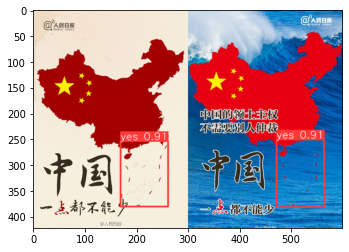

In [ ]:
import torch
import os
from google.colab.patches import cv2_imshow
img = 'http://www.vothuat.vn/app/uploads/2016/07/1-21.jpg'
results = model(img)
results.print()
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

# Test all test_dataset 

In [ ]:
%cd /content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/yolov5/

/content/drive/.shortcut-targets-by-id/1sNb57uh5bK73mVEZMV7wv1YwhYllWF2t/PhatHienDuongLuoiBo/YoloV5/yolov5


In [ ]:
!python detect.py --weights runs/train/exp_batch_size_10_yolov5m_50epoch/weights/best.pt --img 640 --conf 0.8 --source ../data/images/val/

detect: weights=['runs/train/exp_batch_size_10_yolov5m_50epoch/weights/best.pt'], source=../data/images/val/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.8, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-11-g63ddb6f torch 1.8.2+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 290 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/628 /content/drive/.shortcut-targets-by-id/1sNb57uh5bK73mVEZMV7wv1YwhYllWF2t/PhatHienDuongLuoiBo/YoloV5/data/images/val/1.jpg: 544x640 1 yes, Done. (0.036s)
image 2/628 /content/drive/.shortcut-targets-by-id/1sNb57uh5bK73mVEZMV7wv1YwhYllWF2t/PhatHienDuongLuoiBo/YoloV5/data/images/val/10.jpg: 480x640 Done. (0.034s)
image 3/628 /content/d

In [ ]:
!python detect.py --weights runs/train/exp_yolov5m_batchsize_16_50epoch/weights/best.pt --img 640 --conf 0.8 --source ../data/images/val/


detect: weights=['runs/train/exp_yolov5m_batchsize_16_50epoch/weights/best.pt'], source=../data/images/val/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.8, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-11-g63ddb6f torch 1.8.2+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 290 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/628 /content/drive/.shortcut-targets-by-id/1sNb57uh5bK73mVEZMV7wv1YwhYllWF2t/PhatHienDuongLuoiBo/YoloV5/data/images/val/1.jpg: 544x640 1 yes, Done. (0.036s)
image 2/628 /content/drive/.shortcut-targets-by-id/1sNb57uh5bK73mVEZMV7wv1YwhYllWF2t/PhatHienDuongLuoiBo/YoloV5/data/images/val/10.jpg: 480x640 1 yes, Done. (0.034s)
image 3/628 /con

In [6]:
!python detect.py --weights runs/train/exp_yolov5m_batchsize_32_50epoch/weights/best.pt --img 640 --conf 0.8 --source ../data/images/val/


detect: weights=['runs/train/exp_yolov5m_batchsize_32_50epoch/weights/best.pt'], source=../data/images/val/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.8, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-11-g63ddb6f torch 1.8.2+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 290 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/628 /content/drive/.shortcut-targets-by-id/1sNb57uh5bK73mVEZMV7wv1YwhYllWF2t/PhatHienDuongLuoiBo/YoloV5/data/images/val/1.jpg: 544x640 1 yes, Done. (0.086s)
image 2/628 /content/drive/.shortcut-targets-by-id/1sNb57uh5bK73mVEZMV7wv1YwhYllWF2t/PhatHienDuongLuoiBo/YoloV5/data/images/val/10.jpg: 480x640 Done. (0.077s)
image 3/628 /content/d

# Lưu mô hình cho những lần sử dụng sau

In [ ]:
%cp /content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/yolov5/runs/train/exp36/weights/best.pt /content/drive/MyDrive/PhatHienDuongLuoiBo/